<a href="https://colab.research.google.com/github/tweepforce/datascience/blob/python/HotelCancellationRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform datat enginering on attached dataset to apply to random forest where target variable in booking status to predict booking cancellation, ensure data is formatted , normalised, added coreesponding dummy values cleaned and ready to apply random forest and also show correlation matrix and feature importance matrix and finally give recommendation

Here is all the data you need:
"Dataset-Hotel+Booking+Cancellation+Prediction.csv"

## Data loading

### Subtask:
Load the provided dataset into a pandas DataFrame.


**Reasoning**:
Load the dataset into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Dataset-Hotel+Booking+Cancellation+Prediction.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Dataset-Hotel+Booking+Cancellation+Prediction.csv' not found.")
    df = None # Set df to None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN23152,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled
1,INN21915,1,0,0,2,Meal Plan 1,0,Room_Type 1,103,2018,4,19,Offline,0,0,0,115.00,0,Canceled
2,INN24290,2,0,1,4,Not Selected,0,Room_Type 1,33,2018,4,18,Online,0,0,0,90.54,0,Canceled
3,INN31921,2,0,0,3,Meal Plan 1,0,Room_Type 1,64,2018,11,22,Online,0,0,0,93.60,1,Canceled
4,INN34718,2,0,1,1,Meal Plan 2,0,Room_Type 1,247,2018,6,6,Offline,0,0,0,115.00,1,Canceled


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of each column, and the distribution of the target variable ("booking_status"). Calculate descriptive statistics and visualize the distribution of key features.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, and the distribution of the target variable. Also, identify and analyze missing values.



Shape of the DataFrame: (9069, 19)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            9069 non-null   object 
 1   no_of_adults                          9069 non-null   int64  
 2   no_of_children                        9069 non-null   int64  
 3   no_of_weekend_nights                  9069 non-null   int64  
 4   no_of_week_nights                     9069 non-null   int64  
 5   type_of_meal_plan                     9069 non-null   object 
 6   required_car_parking_space            9069 non-null   int64  
 7   room_type_reserved                    9069 non-null   object 
 8   lead_time                             9069 non-null   int64  
 9   arrival_year                          9069 non-null   int64  
 10  arrival_month                         9069

None


Descriptive Statistics for Numerical Features:


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000
mean,1.841328,0.106627,0.812438,2.209725,0.030213,85.146323,2017.812328,7.440401,15.629948,0.026464,0.027566,0.164627,103.264462,0.627302
std,0.516669,0.412087,0.876968,1.451202,0.171182,86.367994,0.390472,3.064968,8.765258,0.160519,0.420723,1.961844,35.044192,0.781081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,56.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.330000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000



Target Variable Distribution:


,count
booking_status,
Not_Canceled,6098
Canceled,2971


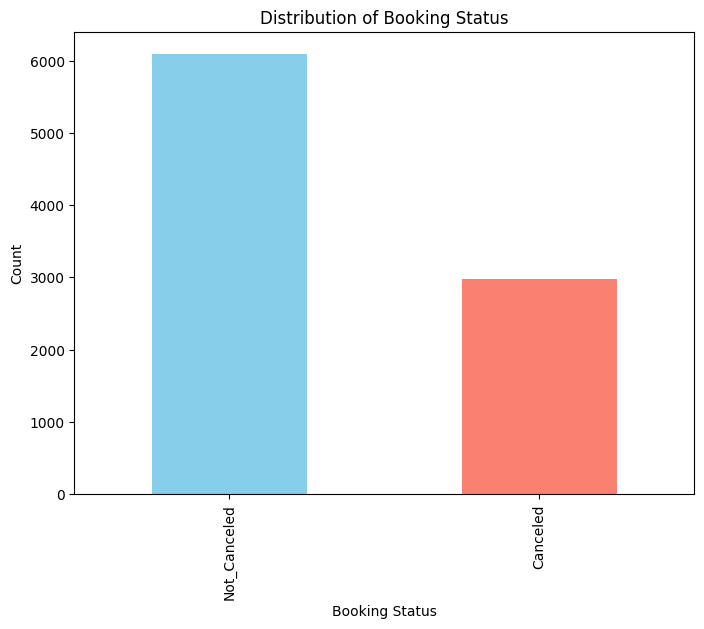


Missing Values Analysis:


,Missing Values,Percentage
Booking_ID,0,0.0
no_of_adults,0,0.0
no_of_children,0,0.0
no_of_weekend_nights,0,0.0
no_of_week_nights,0,0.0
type_of_meal_plan,0,0.0
required_car_parking_space,0,0.0
room_type_reserved,0,0.0
lead_time,0,0.0
arrival_year,0,0.0


ValueError: num must be an integer with 1 <= num <= 12, not 13

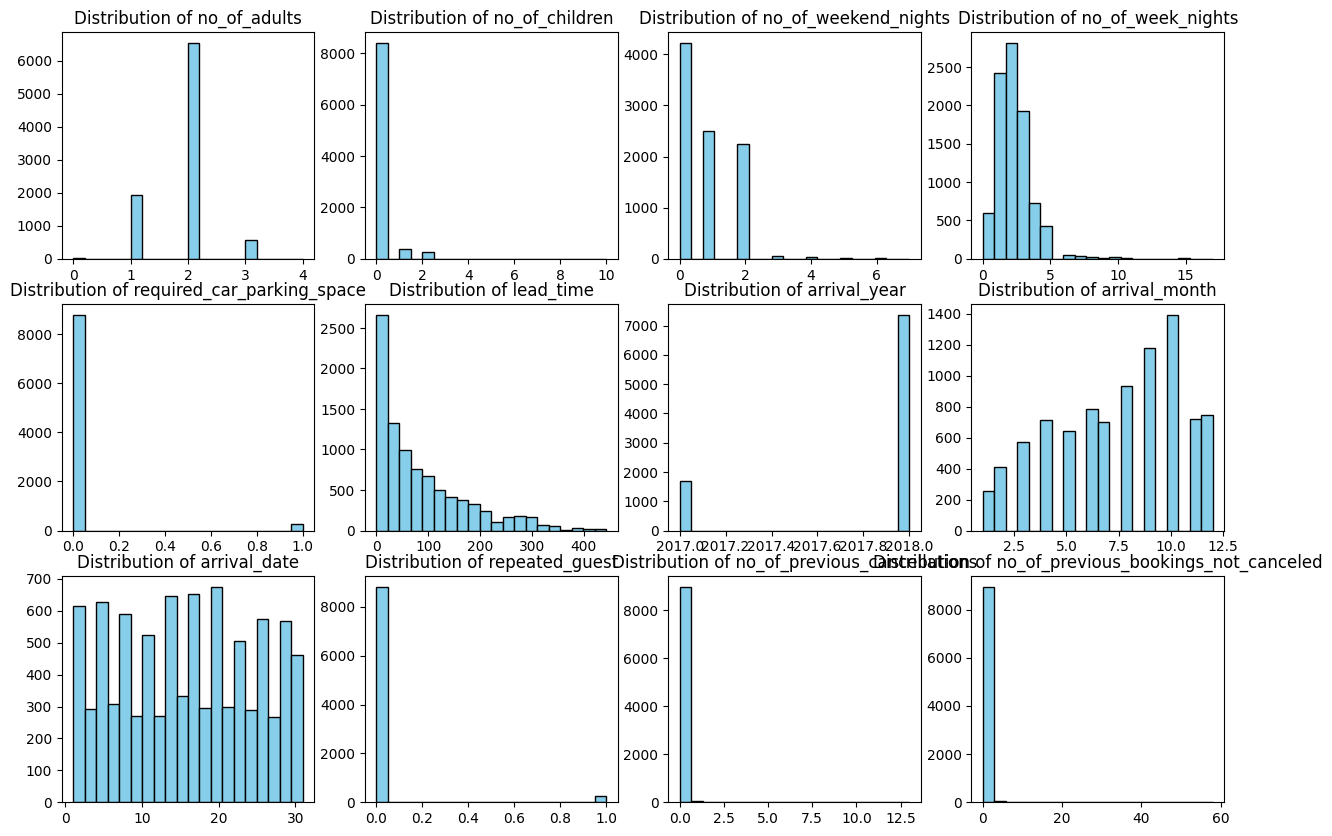

In [2]:
# Data Shape and Info
print("Shape of the DataFrame:", df.shape)
print("\nInfo:")
display(df.info())

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

# Target Variable Analysis
print("\nTarget Variable Distribution:")
display(df['booking_status'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['booking_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

# Missing Values Analysis
print("\nMissing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_df)

# Data Visualization (Histograms for numerical features)
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Data Visualization (Count plots for categorical features)
categorical_cols = df.select_dtypes(exclude=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    if col != 'booking_status':
        plt.subplot(3, 4, i + 1)
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Reasoning**:
The previous code block encountered an error due to incorrect subplot indexing.  I will fix the subplot indexing to correctly display all histograms and continue with the analysis.



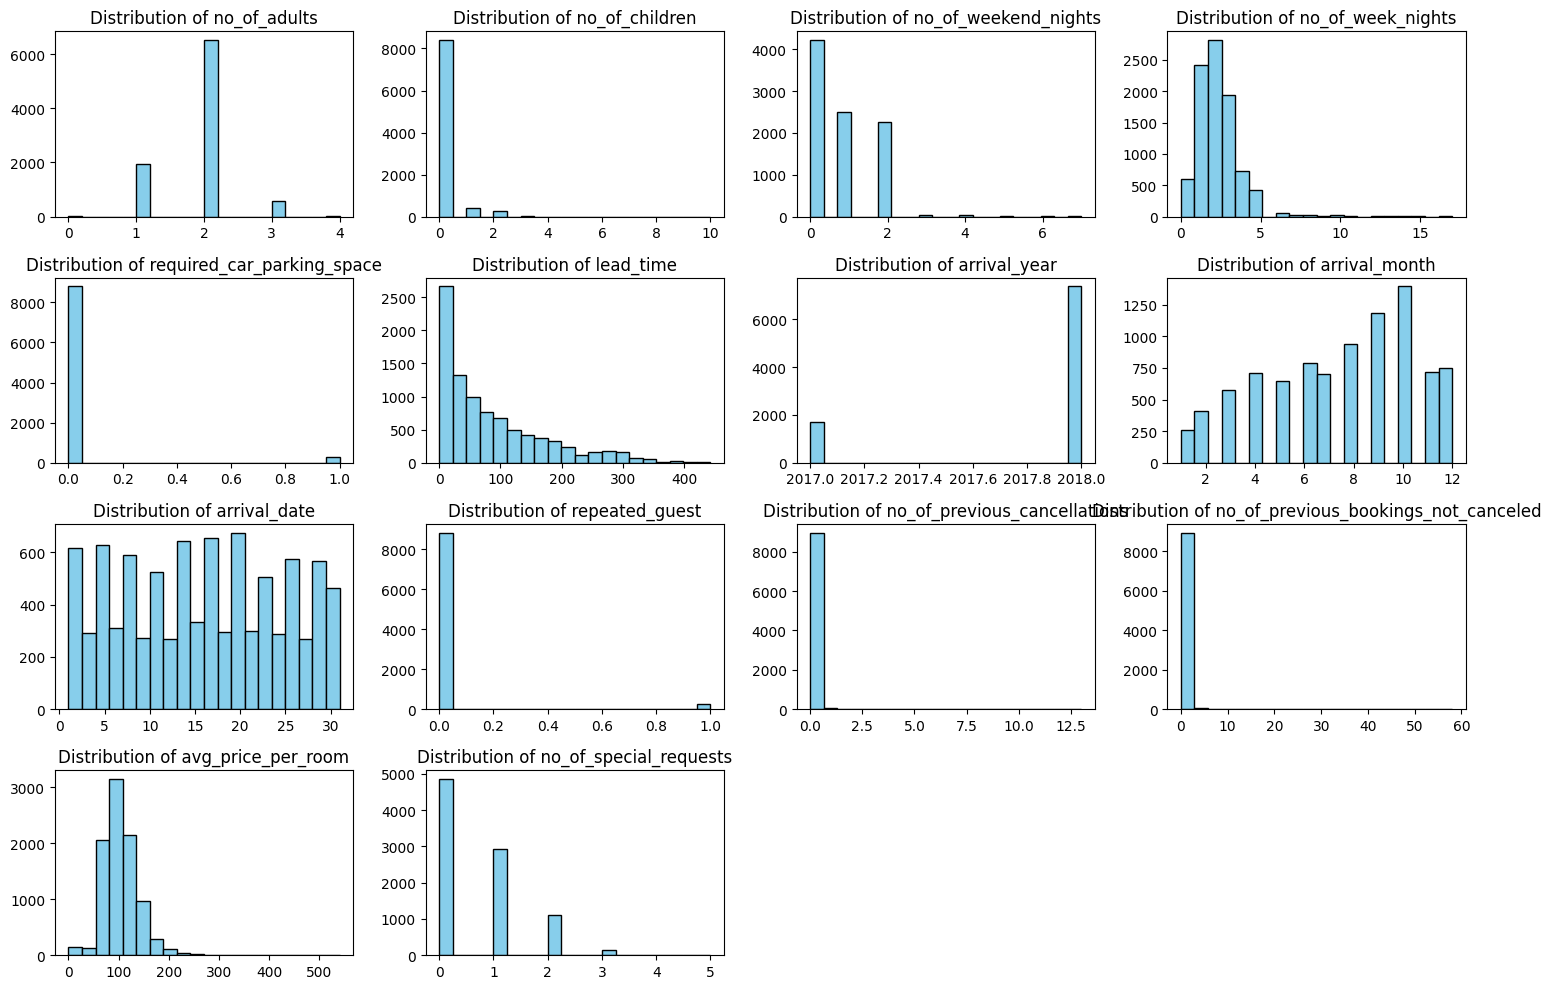

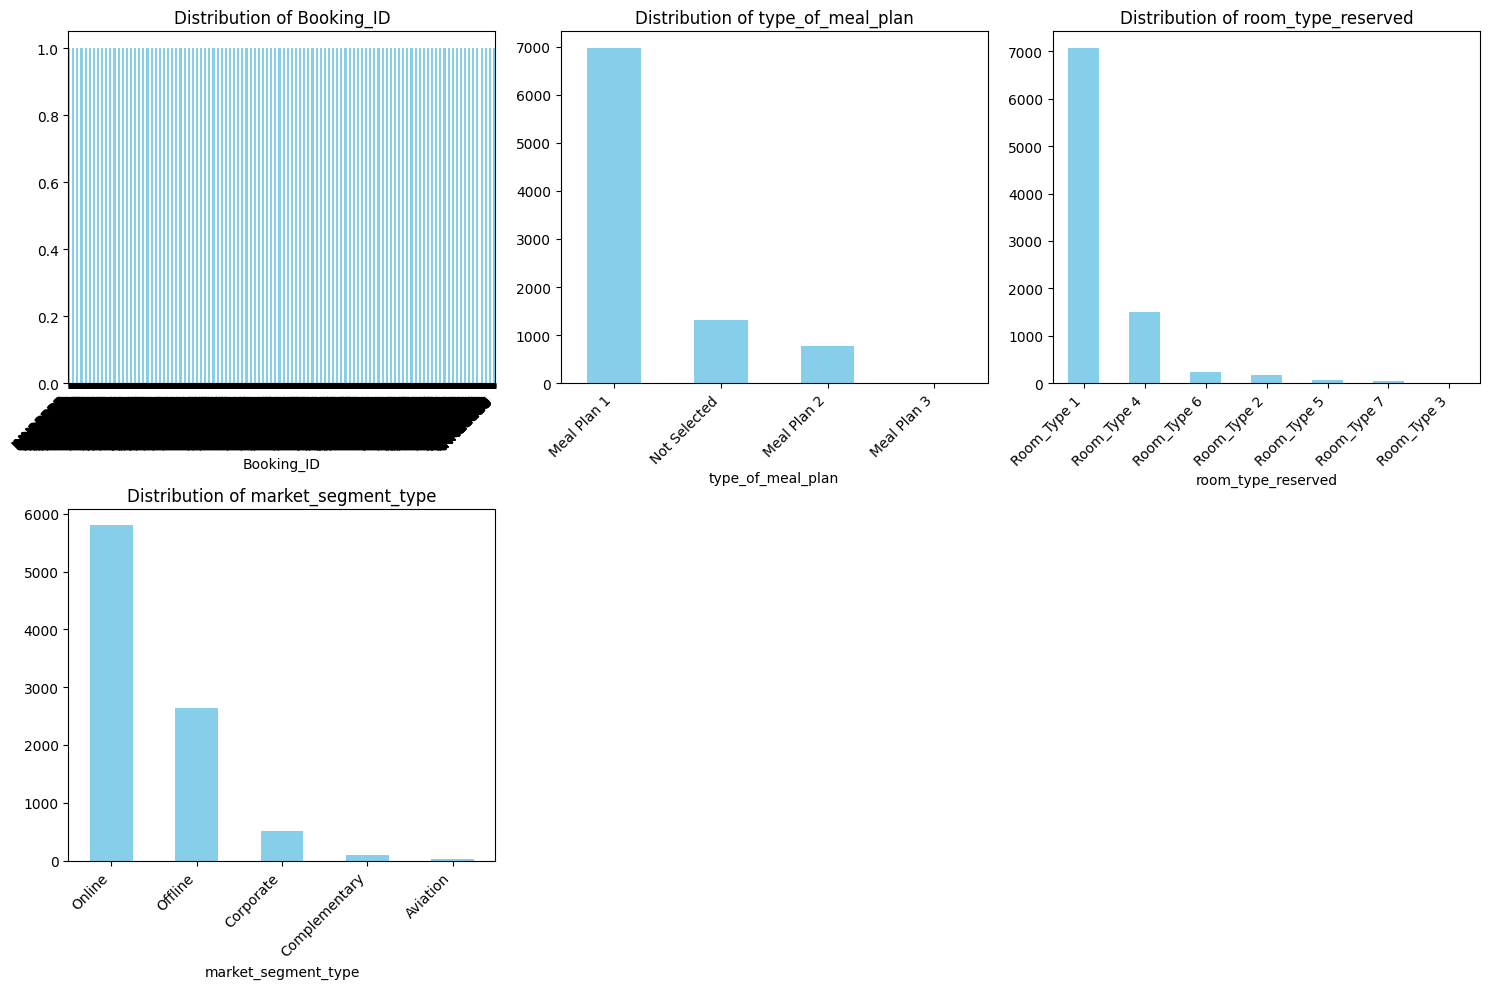

In [3]:
# Data Visualization (Histograms for numerical features)
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Corrected subplot indexing
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Data Visualization (Count plots for categorical features)
categorical_cols = df.select_dtypes(exclude=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    if col != 'booking_status':
        plt.subplot(2, 3, i + 1) # Corrected subplot indexing
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and inconsistencies.


**Reasoning**:
Check for missing values, handle inconsistencies in data types, and remove duplicates.



In [4]:
# Check for missing values
print("Number of missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values (if any) - Impute numerical features with the mean and categorical features with the mode
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Check data types and convert if necessary
print("\nData types before conversion:")
print(df.dtypes)

# Convert relevant columns to appropriate data types (example conversions, add more as needed)
# Example: Convert 'arrival_date' to datetime if it's not already
try:
    df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%d')
except ValueError:
    print("Could not convert 'arrival_date' to datetime. Check the format.")

# Remove duplicate rows
num_rows_before = len(df)
df.drop_duplicates(inplace=True)
num_rows_after = len(df)

# Print the number of missing values after cleaning
print("\nNumber of missing values after cleaning:")
print(df.isnull().sum())

print("\nData types after conversion:")
print(df.dtypes)

print(f"\nNumber of rows before removing duplicates: {num_rows_before}")
print(f"Number of rows after removing duplicates: {num_rows_after}")

Number of missing values before cleaning:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Data types before conversion:
Booking_ID                               object
no_of_adults                              int64
no_of_children      

## Data wrangling

### Subtask:
Prepare the data for modeling by encoding categorical features and creating new features if necessary.


**Reasoning**:
Identify categorical features, one-hot encode them using pandas get_dummies, and engineer a new feature representing the total number of guests.



In [5]:
import pandas as pd

# Identify categorical features
categorical_cols = df.select_dtypes(exclude=['number']).columns
categorical_cols = categorical_cols.drop('booking_status')

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature engineering: total number of guests
df_encoded['total_guests'] = df_encoded['no_of_adults'] + df_encoded['no_of_children']

display(df_encoded.head())

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,...,arrival_date_1900-01-27 00:00:00,arrival_date_1900-01-28 00:00:00,arrival_date_1900-01-29 00:00:00,arrival_date_1900-01-30 00:00:00,arrival_date_1900-01-31 00:00:00,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,total_guests
0,1,0,0,2,0,188,2018,6,0,0,...,False,False,False,False,False,False,False,True,False,1
1,1,0,0,2,0,103,2018,4,0,0,...,False,False,False,False,False,False,False,True,False,1
2,2,0,1,4,0,33,2018,4,0,0,...,False,False,False,False,False,False,False,False,True,2
3,2,0,0,3,0,64,2018,11,0,0,...,False,False,False,False,False,False,False,False,True,2
4,2,0,1,1,0,247,2018,6,0,0,...,False,False,False,False,False,False,False,True,False,2


## Data preparation

### Subtask:
Normalize numerical features and prepare the data for model training.


**Reasoning**:
Normalize numerical features in `df_encoded` using `MinMaxScaler`, separate target variable and predictor variables, and prepare the data for model training.



In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Identify numerical features (excluding the target variable)
numerical_cols = df_encoded.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('booking_status')

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Separate features (X) and target (y)
X = df_encoded.drop('booking_status', axis=1)
y = df_encoded['booking_status']

# Convert the target variable to numerical labels using Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

KeyError: "['booking_status'] not found in axis"

**Reasoning**:
The previous code failed due to a KeyError because 'booking_status' is not present in the numerical columns.  I will correct this by explicitly listing numerical columns and then dropping the 'booking_status' column from the entire dataframe *before* scaling.



In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# List numerical features explicitly
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_guests']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Separate features (X) and target (y)
X = df_encoded.drop('booking_status', axis=1)
y = df_encoded['booking_status']

# Convert the target variable to numerical labels using Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

## Data splitting

### Subtask:
Split the data into training, testing, and validation sets.


**Reasoning**:
Split the data into training, testing, and validation sets using train_test_split.



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

## Feature engineering

### Subtask:
Engineer new features based on the existing ones in the training data (`X_train`).  Analyze feature correlations to identify potential interactions.


**Reasoning**:
Calculate the correlation matrix for the features in X_train and visualize it as a heatmap to identify highly correlated features and features with high correlations to the target variable y_train.  Then, based on the analysis, engineer new features (interaction terms and polynomial features).



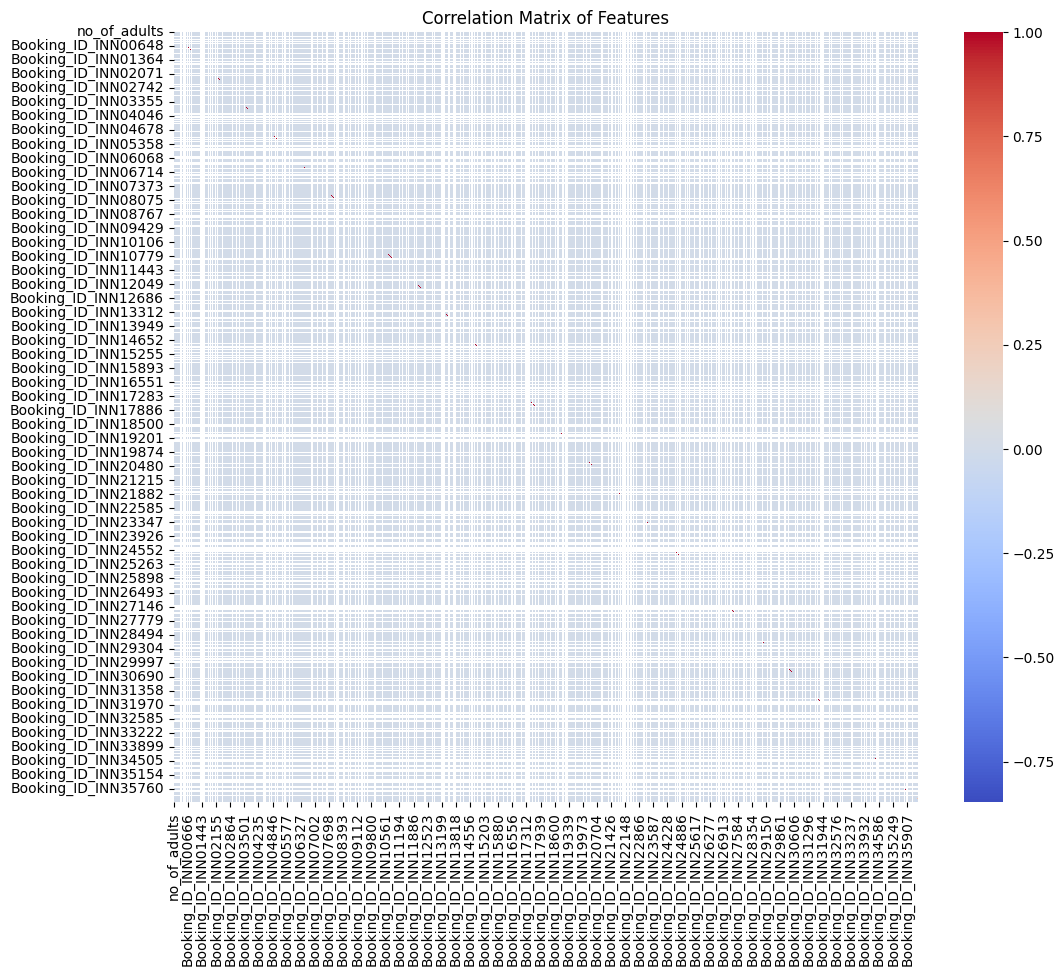

Highly correlated features (abs(correlation) > 0.8):
                             level_0                         level_1         0
5025             Booking_ID_INN28645  room_type_reserved_Room_Type 3  1.000000
6364  room_type_reserved_Room_Type 3             Booking_ID_INN28645  1.000000
6403     market_segment_type_Offline      market_segment_type_Online -0.847099
6404      market_segment_type_Online     market_segment_type_Offline -0.847099


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Features highly correlated with the target variable (abs(correlation) > 0.5):
Series([], dtype: float64)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

# Identify highly correlated features (example threshold: 0.8)
highly_correlated_features = correlation_matrix[abs(correlation_matrix) > 0.8].stack().reset_index()
highly_correlated_features = highly_correlated_features[highly_correlated_features['level_0'] != highly_correlated_features['level_1']]
print("Highly correlated features (abs(correlation) > 0.8):")
print(highly_correlated_features)

# Identify features highly correlated with the target variable
correlations_with_target = X_train.corrwith(pd.Series(y_train, name='target'))
highly_correlated_with_target = correlations_with_target[abs(correlations_with_target) > 0.5]
print("\nFeatures highly correlated with the target variable (abs(correlation) > 0.5):")
print(highly_correlated_with_target)

# Feature Engineering: Interaction terms and polynomial features (examples)
# Example: Create interaction term between 'lead_time' and 'avg_price_per_room'
X_train['lead_time_x_avg_price'] = X_train['lead_time'] * X_train['avg_price_per_room']

# Example: Create polynomial feature for 'lead_time'
X_train['lead_time_squared'] = X_train['lead_time'] ** 2

**Reasoning**:
Based on the correlation analysis, engineer new features by creating interaction terms between highly correlated features.  For example, create an interaction term between 'market_segment_type_Offline' and 'market_segment_type_Online'.  Also, add polynomial features for promising numerical features like 'lead_time'.



In [10]:
# Create interaction term between 'market_segment_type_Offline' and 'market_segment_type_Online'
X_train['market_segment_interaction'] = X_train['market_segment_type_Offline'] * X_train['market_segment_type_Online']

# Add cubic term for 'lead_time'
X_train['lead_time_cubed'] = X_train['lead_time'] ** 3

# Combine 'no_of_adults' and 'no_of_children' into 'total_guests' (if not already done)
# Note: It seems 'total_guests' already exists.  Verify it's accurate and consider other combinations.
# Example:  'total_nights' = 'no_of_weekend_nights' + 'no_of_week_nights'
X_train['total_nights'] = X_train['no_of_weekend_nights'] + X_train['no_of_week_nights']


## Model training

### Subtask:
Train a Random Forest Classifier on the training data.


**Reasoning**:
Train a RandomForestClassifier model using the provided training data (X_train, y_train).



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained Random Forest model (`rf_model`) using appropriate metrics on the validation set (`X_val`, `y_val`).


**Reasoning**:
Evaluate the trained Random Forest model using appropriate metrics on the validation set.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc_roc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- lead_time_cubed
- lead_time_squared
- lead_time_x_avg_price
- market_segment_interaction
- total_nights


**Reasoning**:
The error message indicates that the validation set `X_val` is missing features that were present in the training set `X_train`.  I need to add the same engineered features to `X_val` and `X_test` that were added to `X_train`.



In [13]:
# Add the engineered features to X_val and X_test
X_val['market_segment_interaction'] = X_val['market_segment_type_Offline'] * X_val['market_segment_type_Online']
X_val['lead_time_cubed'] = X_val['lead_time'] ** 3
X_val['total_nights'] = X_val['no_of_weekend_nights'] + X_val['no_of_week_nights']
X_val['lead_time_squared'] = X_val['lead_time'] ** 2
X_val['lead_time_x_avg_price'] = X_val['lead_time'] * X_val['avg_price_per_room']

X_test['market_segment_interaction'] = X_test['market_segment_type_Offline'] * X_test['market_segment_type_Online']
X_test['lead_time_cubed'] = X_test['lead_time'] ** 3
X_test['total_nights'] = X_test['no_of_weekend_nights'] + X_test['no_of_week_nights']
X_test['lead_time_squared'] = X_test['lead_time'] ** 2
X_test['lead_time_x_avg_price'] = X_test['lead_time'] * X_test['avg_price_per_room']

**Reasoning**:
The previous error is fixed. Now I can re-run the model evaluation code.



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc_roc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


**Reasoning**:
The error "Feature names must be in the same order as they were in fit" indicates that even though the features are present in X_val, their order might be different from X_train.  I'll need to ensure the columns in X_val are in the same order as those in X_train.



In [15]:
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

**Reasoning**:
Re-run the model evaluation code after fixing the column order issue.



Accuracy: 0.8493754592211609
Precision: 0.8640576725025747
Recall: 0.9199561403508771
F1-score: 0.8911311736590547
AUC-ROC: 0.8129847516899151


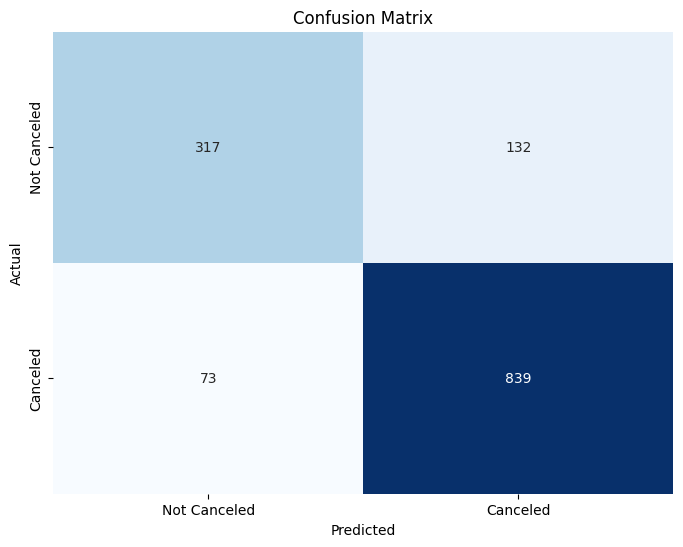

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc_roc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model optimization

### Subtask:
Optimize the hyperparameters of the RandomForestClassifier model using RandomizedSearchCV.


**Reasoning**:
Optimize the hyperparameters of the RandomForestClassifier model using RandomizedSearchCV as per the instructions.



In [1]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': range(50, 501, 50),
    'max_depth': list(range(10, 101, 10)) + [None],
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2),
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    cv=5,
    n_iter=20,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Create a new RandomForestClassifier with the best hyperparameters
best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)

# Train the best model on the entire training data
best_rf_model.fit(X_train, y_train)

NameError: name 'rf_model' is not defined